# Autoencoders

## Autoencoders

- When training CNNs, one of the problems is that we need a lot of labeled data.

- However, we might want to use raw (unlabeled) data for training CNN feature extractors, which is called **<font color='red'>self-supervised learning</font>**.
- Instead of labels, we use training images as both network input and output.

-  The main idea of **<font color='red'>autoencoder</font>** is that we will have an **encoder network** that converts input image into some **<font color='blue'>latent space</font>** (normally it is just a vector of some smaller size), and a **decoder network**, whose goal would be to reconstruct the original image.

## Autoencoders

- We train autoencoder to capture as much of the information from the original images as possible for accurate reconstruction, the network tries to find best **<font color='red'>embedding</font>** of input images to capture the meaning.

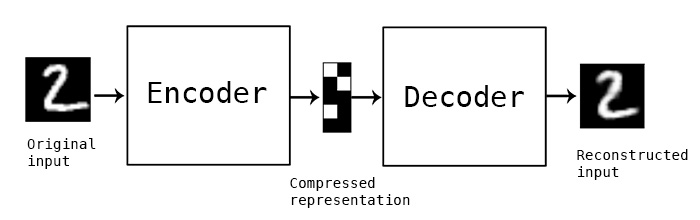

### Example: Autoencoders with MNIST

In [37]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [38]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_trainclass), (x_test, y_testclass) = mnist.load_data()

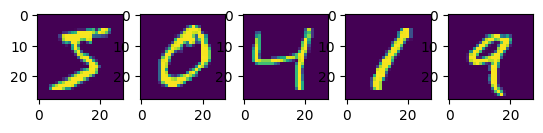

In [39]:
def plotn(n, x):
    fig, ax = plt.subplots(1, n)
    for i, z in enumerate(x[0:n]):
        ax[i].imshow(z.reshape(28,28) if z.size==28*28 else z.reshape(14,14) if z.size==14*14 else z)
    plt.show()

plotn(5,x_train)

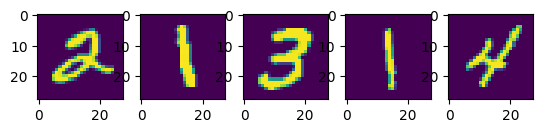

In [40]:
def plotidx(indices, x):
    fig, ax = plt.subplots(1, len(indices))
    for i, z in enumerate(x[indices]):
        ax[i].imshow(z.reshape(28,28) if z.size==28*28 else z.reshape(14,14) if z.size==14*14 else z)
    plt.show()

plotidx([5,6,7,8,9],x_train)

### Example: Autoencoders with MNIST

In [41]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.losses import binary_crossentropy, mse

In [43]:
input_img = Input(shape=(28,28,1))

x = Conv2D(16, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

encoder = Model(input_img, encoded)

input_rep = Input(shape=(4,4,8))

x = Conv2D(8, (3,3), activation='relu', padding='same')(input_rep)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, (3,3), activation='relu')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

decoder = Model(input_rep, decoded)

autoencoder = Model(input_img, decoder(encoder(input_img)))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

### Example: Autoencoders with MNIST

In [44]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [12]:
autoencoder.fit(x_train, x_train, 
                epochs=25,
                batch_size=128, 
                shuffle=True, 
                validation_data=(x_test, x_test))

Epoch 1/25
469/469 [==============================] - 7s 16ms/step - loss: 0.1455 - val_loss: 0.1335
Epoch 2/25
469/469 [==============================] - 7s 16ms/step - loss: 0.1290 - val_loss: 0.1229
Epoch 3/25
469/469 [==============================] - 7s 15ms/step - loss: 0.1205 - val_loss: 0.1163
Epoch 4/25
469/469 [==============================] - 7s 15ms/step - loss: 0.1148 - val_loss: 0.1113
Epoch 5/25
469/469 [==============================] - 7s 15ms/step - loss: 0.1107 - val_loss: 0.1083
Epoch 6/25
469/469 [==============================] - 7s 15ms/step - loss: 0.1080 - val_loss: 0.1057
Epoch 7/25
469/469 [==============================] - 7s 15ms/step - loss: 0.1061 - val_loss: 0.1042
Epoch 8/25
469/469 [==============================] - 7s 15ms/step - loss: 0.1046 - val_loss: 0.1029
Epoch 9/25
469/469 [==============================] - 7s 15ms/step - loss: 0.1035 - val_loss: 0.1019
Epoch 10/25
469/469 [==============================] - 7s 15ms/step - loss: 0.1024 - val_lo

### Example: Autoencoders with MNIST

1/1 [==============================] - 0s 100ms/step


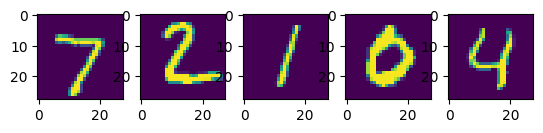

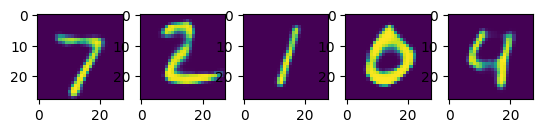

In [13]:
y_test = autoencoder.predict(x_test[0:5])
plotn(5,x_test)
plotn(5,y_test)

1/1 [==============================] - 0s 16ms/step


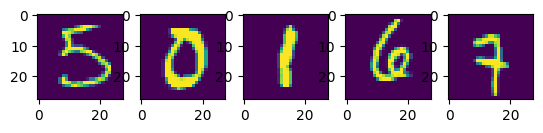

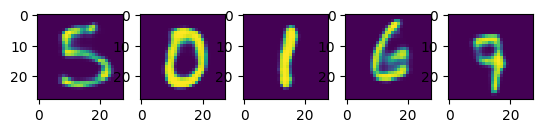

In [14]:
indices = [15, 28, 39, 123, 1012]
y_test = autoencoder.predict(x_test[indices])
plotidx(indices, x_test)
plotn(len(indices), y_test)

We consider some example inputs

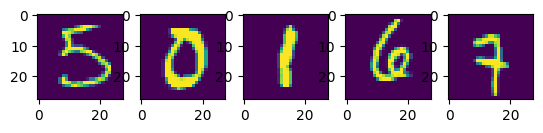

In [23]:
indices = [15, 28, 39, 123, 1012]
plotidx(indices, x_test)

We use the (trained) encoder to convert the input images into some latent space vectors.

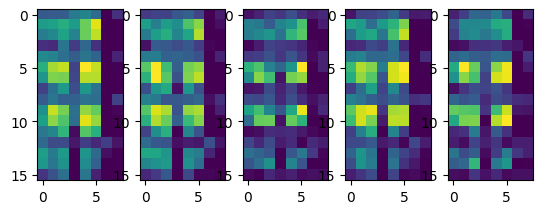

In [24]:
encoder = Model(input_img, encoded);
encoded_imgs = encoder.predict(x_test[indices], verbose=False);
plotn(len(indices),encoded_imgs.reshape(5,-1,8))

Let's decode the latent space vectors into images.

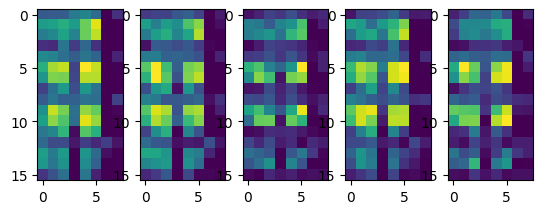

In [26]:
plotn(len(indices),encoded_imgs.reshape(5,-1,8))

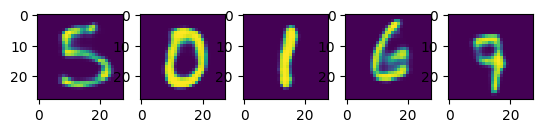

In [27]:
res = decoder.predict(encoded_imgs, verbose=False)
plotn(len(indices), res)

### Example: Autoencoder with MNIST

If we add some small noise to the latent space representations.

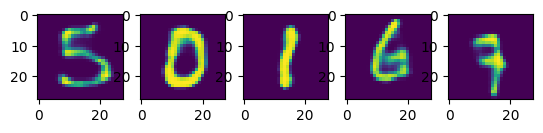

In [29]:
res = decoder.predict(encoded_imgs + 0.1*np.random.randn(len(indices),4,4,8), verbose=False)
plotn(len(indices), res)

If we add a lot of noise to the latent space representations.

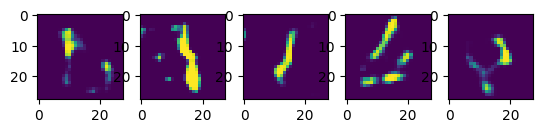

In [30]:
res = decoder.predict(encoded_imgs + np.random.randn(len(indices),4,4,8), verbose=False)
plotn(len(indices), res)

If we just pass noises to the decoder.

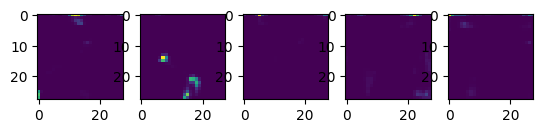

In [38]:
res = decoder.predict(np.random.rand(5,4,4,8), verbose=False)
plotn(5,res)

# Denoising

## Denoising

- Autoencoders can be used to remove noise from images.

- To train **<font color='red'>denoiser</font>**, we start with noise-free images, and add artificial noise to them.
- We feed autoencoder with **<font color='red'>noisy images as input</font>**, and **<font color='blue'>noise-free images as output</font>**.

### Example: Denoising for MNIST

We create a noisy dataset from the original noise-free MNIST dataset.

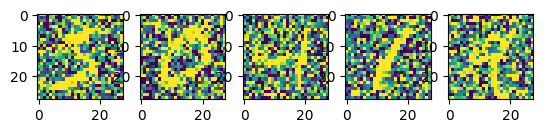

In [39]:
def noisify(data):
  return np.clip(data+np.random.normal(loc=0.5,scale=0.5,size=data.shape),0.,1.)

x_train_noise = noisify(x_train)
x_test_noise = noisify(x_test)

plotn(5,x_train_noise)

### Example: Denoising for MNIST

We train an autoencoder for the denoising task with noisy images as input and noise-free images as output.

In [40]:
autoencoder.fit(x_train_noise, x_train,
                epochs=25,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noise, x_test))

Epoch 1/25
469/469 [==============================] - 7s 15ms/step - loss: 0.2232 - val_loss: 0.1877
Epoch 2/25
469/469 [==============================] - 7s 16ms/step - loss: 0.1801 - val_loss: 0.1718
Epoch 3/25
469/469 [==============================] - 7s 15ms/step - loss: 0.1674 - val_loss: 0.1612
Epoch 4/25
469/469 [==============================] - 7s 15ms/step - loss: 0.1599 - val_loss: 0.1560
Epoch 5/25
469/469 [==============================] - 7s 16ms/step - loss: 0.1554 - val_loss: 0.1523
Epoch 6/25
469/469 [==============================] - 7s 16ms/step - loss: 0.1521 - val_loss: 0.1495
Epoch 7/25
469/469 [==============================] - 7s 15ms/step - loss: 0.1494 - val_loss: 0.1472
Epoch 8/25
469/469 [==============================] - 7s 16ms/step - loss: 0.1471 - val_loss: 0.1444
Epoch 9/25
469/469 [==============================] - 7s 15ms/step - loss: 0.1452 - val_loss: 0.1431
Epoch 10/25
469/469 [==============================] - 7s 15ms/step - loss: 0.1436 - val_lo

### Example: Denoising for MNIST

We test the trained autoencoder to denoise some noisy images.

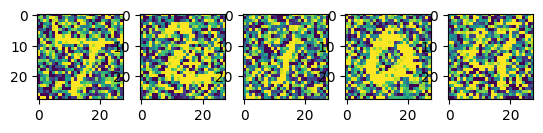

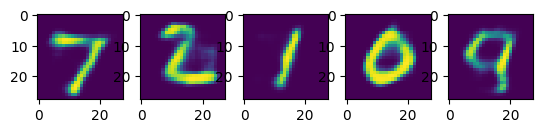

In [41]:
y_test = autoencoder.predict(x_test_noise[0:5], verbose=False)
plotn(5,x_test_noise)
plotn(5,y_test)

**Exercises:** *The Fashion-MNIST dataset has the same image size. Let's try an autoencoder trained on MNIST to denoise Fashion-MNIST images, and vice versa.*

# Super-resolution

- Similarly to denoiser, we can train autoencoders to increase the resolution of images.

- To train super-resolution network, we start with high-resolution images, and automatically downscale them to produce network inputs.
- We feed the autoencoder with small images as inputs and high-res images as outputs.

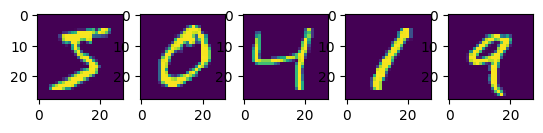

In [42]:
plotn(5, x_train)

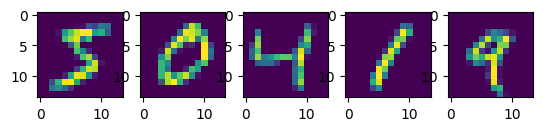

In [43]:
x_train_lr = tf.keras.layers.AveragePooling2D()(x_train).numpy()
x_test_lr = tf.keras.layers.AveragePooling2D()(x_test).numpy()
plotn(5, x_train_lr)

### Example: Super-resolution on MNIST

In [2]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.losses import binary_crossentropy, mse

In [45]:
input_img = Input(shape=(14, 14, 1))

x = Conv2D(16, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

encoder = Model(input_img, encoded)

input_rep = Input(shape=(4,4,8))

x = Conv2D(8, (3,3), activation='relu', padding='same')(input_rep)
x = UpSampling2D((2,2))(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, (3,3), activation='relu')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

decoder = Model(input_rep, decoded)

autoencoder = Model(input_img, decoder(encoder(input_img)))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

We feed the autoencoder with small images as inputs and high-res images as outputs.

In [46]:
autoencoder.fit(x_train_lr, x_train,
               epochs=25,
               batch_size=128,
               shuffle=True,
               validation_data=(x_test_lr, x_test))

Epoch 1/25
469/469 [==============================] - 6s 12ms/step - loss: 0.2228 - val_loss: 0.1549
Epoch 2/25
469/469 [==============================] - 6s 12ms/step - loss: 0.1420 - val_loss: 0.1308
Epoch 3/25
469/469 [==============================] - 6s 12ms/step - loss: 0.1268 - val_loss: 0.1212
Epoch 4/25
469/469 [==============================] - 6s 12ms/step - loss: 0.1197 - val_loss: 0.1163
Epoch 5/25
469/469 [==============================] - 6s 12ms/step - loss: 0.1152 - val_loss: 0.1123
Epoch 6/25
469/469 [==============================] - 6s 12ms/step - loss: 0.1119 - val_loss: 0.1100
Epoch 7/25
469/469 [==============================] - 6s 12ms/step - loss: 0.1094 - val_loss: 0.1068
Epoch 8/25
469/469 [==============================] - 6s 13ms/step - loss: 0.1074 - val_loss: 0.1050
Epoch 9/25
469/469 [==============================] - 6s 12ms/step - loss: 0.1057 - val_loss: 0.1037
Epoch 10/25
469/469 [==============================] - 6s 12ms/step - loss: 0.1043 - val_lo

### Example: Super-resolution on MNIST

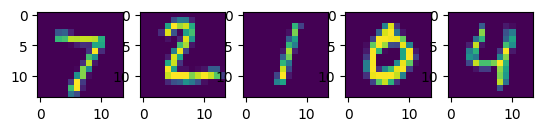

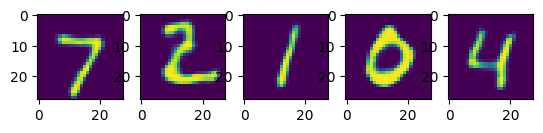

In [48]:
y_test_lr = autoencoder.predict(x_test_lr[0:5], verbose=False)
plotn(5, x_test_lr)
plotn(5, y_test_lr)

**Exercise:**
- *Try to train similarly a super-resolution network on Fashion-MNIST.*
- *Try to train super-resolution networks on CIFAR-10 for 2x and 4x upscaling.*

# Variational Auto-Encoders (VAE)

## Variational Auto-Encoders (VAE)

- Traditional autoencoders reduce the dimension of the input data somehow, figuring out the important features of input images. However, latent vectors often do not make much sense

- Taking MNIST dataset as an example, figuring out which digits correspond to different latent vectors is not an easy task, because *<font color='red'>close latent vectors would not necessarily correspond to the same digits</font>*.

- To train **generative models**, it is better to have some understanding of the latent space. This idea leads to **<font color='red'>variational auto-encoder (VAE)</font>**.

## Variational Auto-Encoders (VAE)

- VAE is the autoencoder that learns to predict *statistical distribution of the latent parameters*, so-called **<font color='red'>latent distribution</font>**.

- For example, we assume that latent vectors would be distributed as $\mathcal{N}(z_{\text{mean}}, e^{\text{z_log_sigma}})$, where $z_{\text{mean}},z\text{_log_sigma}\in\mathbb{R}^{d}$.

- Encoder in VAE learns to predict those parameters, and then decoder takes a random vector from this distribution to reconstruct the object.

## Variational Auto-Encoders (VAE)

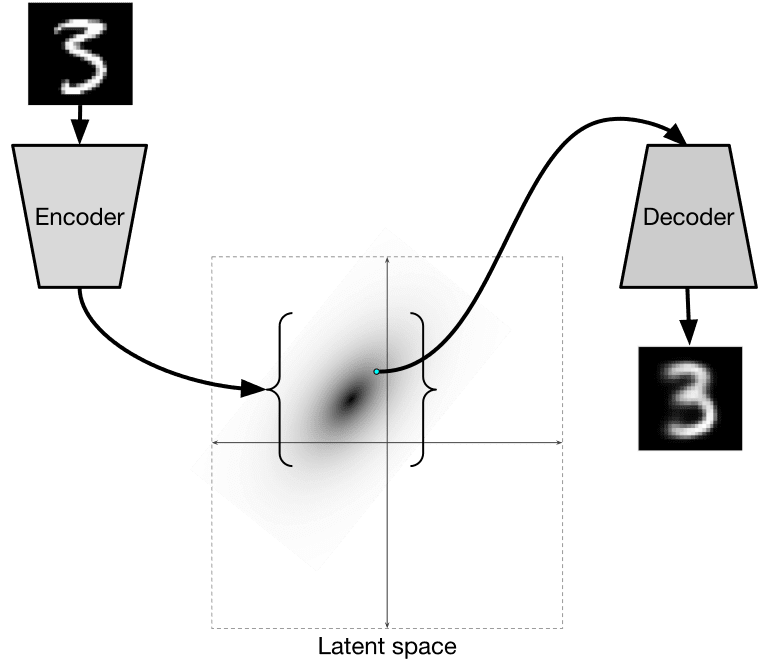

## Variational Auto-Encoders (VAE)

- From input vector, we predict `z_mean` and `z_log_sigma` (instead of predicting the standard deviation itself, we predict its logarithm).

- We sample a vector `sample` from the distribution $\mathcal{N}(\text{z_mean},\text{z_log_sigma})$.

- Decoder tries to decode the original image using `sample` as an input vector.

### Example: VAE on MNIST

In [45]:
intermediate_dim = 512
latent_dim = 2
batch_size = 128

tf.compat.v1.disable_eager_execution()

inputs = Input(shape=(784,))
h = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)

In [46]:
@tf.function
def sampling(args):
    z_mean, z_log_sigma = args
    bs = tf.shape(z_mean)[0]
    epsilon = tf.random.normal(shape=(bs, latent_dim))
    return z_mean + tf.exp(z_log_sigma) * epsilon

z = Lambda(sampling)([z_mean, z_log_sigma])

### Example: VAE on MNIST

In [47]:
encoder = Model(inputs, [z_mean, z_log_sigma, z])

latent_inputs = Input(shape=(latent_dim,))
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(784, activation='sigmoid')(x)

decoder = Model(latent_inputs, outputs)

outputs = decoder(encoder(inputs)[2])

vae = Model(inputs, outputs)

### Example: VAE on MNIST

VAEs use a loss function consisting of two parts:
- **Reconstruction loss:** shows how close reconstructed image is to the target (can be `MSE`). It is the same loss function as in normal autoencoders.
- **KL loss**: based on Kullback-Leibler divergence - a metric to estimate how similar two statistical distributions are. KL loss ensures that latent variable distributions tays close to normal distribution.

Reference: https://kvfrans.com/deriving-the-kl/

In [48]:
@tf.function
def vae_loss(x1, x2):
    reconstruction_loss = mse(x1, x2)*784
    tmp = 1 + z_log_sigma - tf.square(z_mean) - tf.exp(z_log_sigma)
    kl_loss = -0.5*tf.reduce_sum(tmp, axis=-1)
    return tf.convert_to_tensor(tf.reduce_mean(reconstruction_loss + kl_loss))

vae.compile(optimizer='rmsprop', loss=vae_loss)

### Example: VAE on MNIST

In [49]:
x_train_flat = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_flat = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train_flat, x_train_flat,
        shuffle=True,
        epochs=25,
        batch_size=batch_size,
        validation_data=(x_test_flat, x_test_flat))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 3s 55us/sample - loss: 48.4083 - val_loss: 42.4046
Epoch 2/25
60000/60000 [==============================] - 3s 47us/sample - loss: 41.6079 - val_loss: 40.8550
Epoch 3/25
60000/60000 [==============================] - 3s 45us/sample - loss: 40.4213 - val_loss: 40.1389
Epoch 4/25
60000/60000 [==============================] - 3s 46us/sample - loss: 39.6158 - val_loss: 39.3001
Epoch 5/25
60000/60000 [==============================] - 3s 48us/sample - loss: 38.9903 - val_loss: 38.7456
Epoch 6/25
60000/60000 [==============================] - 3s 47us/sample - loss: 38.4941 - val_loss: 38.3061
Epoch 7/25
60000/60000 [==============================] - 3s 47us/sample - loss: 38.0835 - val_loss: 37.9434
Epoch 8/25
60000/60000 [==============================] - 3s 47us/sample - loss: 37.7461 - val_loss: 37.9262
Epoch 9/25
60000/60000 [==============================] - 3s 47us/sample - los

### Example: VAE on MNIST

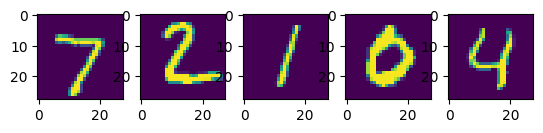

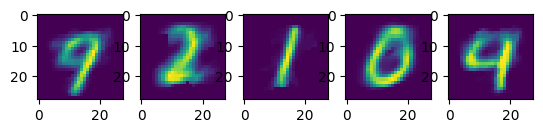

In [50]:
y_test = vae.predict(x_test_flat[0:5])
plotn(5,x_test_flat)
plotn(5,y_test)

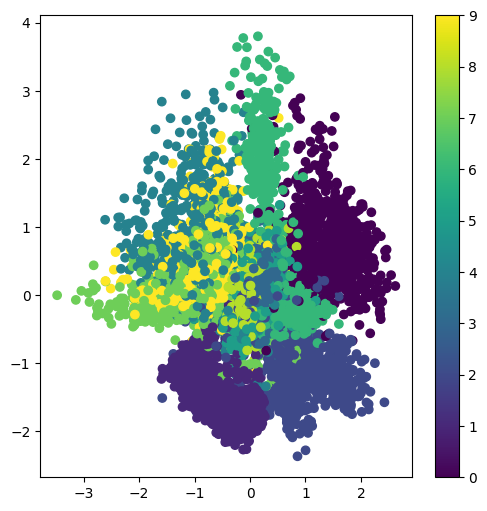

In [51]:
x_test_encoded = encoder.predict(x_test_flat)[0]
plt.figure(figsize=(6,6))
plt.scatter(x_test_encoded[:,0], x_test_encoded[:,1], c=y_testclass)
plt.colorbar()
plt.show()

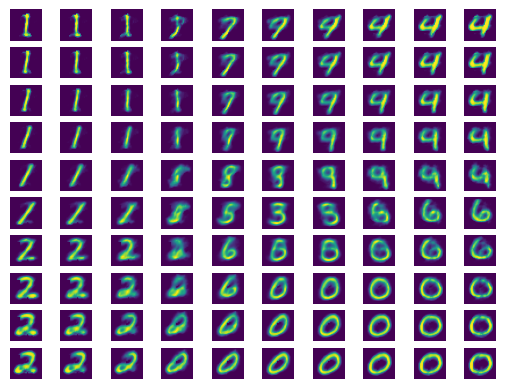

In [52]:
def plotsample(n):
    dx = np.linspace(-2,2,n)
    dy = np.linspace(-2,2,n)
    fig,ax = plt.subplots(n,n)
    for i,xi in enumerate(dx):
        for j,xj in enumerate(dy):
            res = decoder.predict(np.array([xi,xj]).reshape(-1,2))[0]
            ax[i,j].imshow(res.reshape(28,28))
            ax[i,j].axis('off')
    plt.show()

plotsample(10)

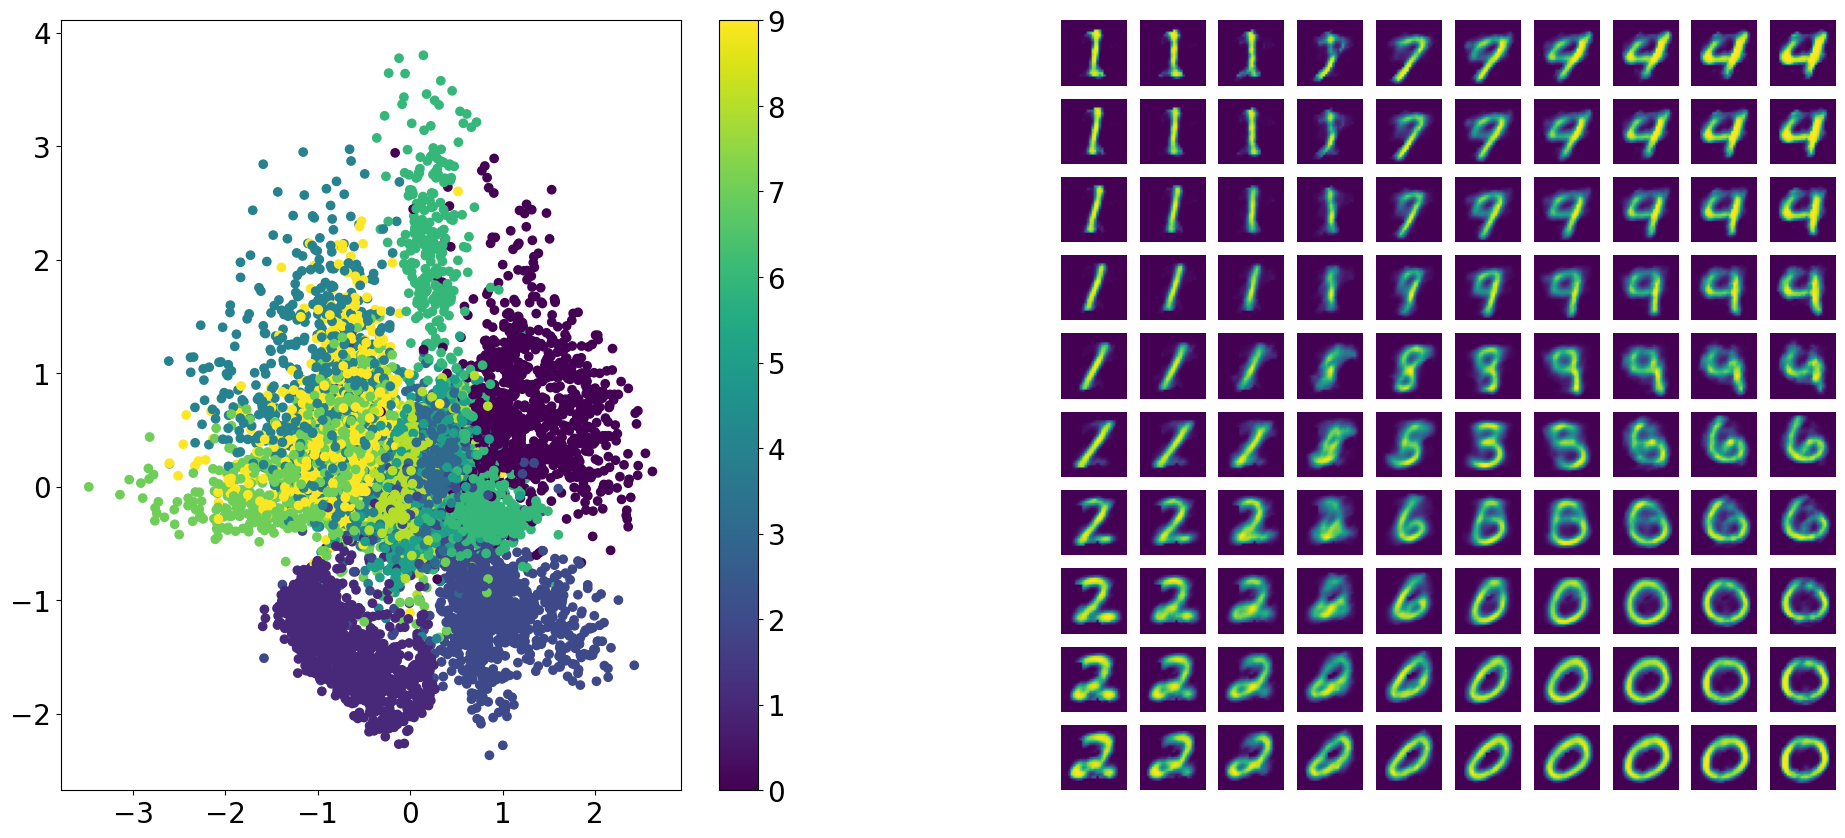

In [94]:
fig = plt.figure(figsize=(20, 10))
subfigs = fig.subfigures(1, 2)

axsLeft = subfigs[0].subplots(1,1)
x_test_encoded = encoder.predict(x_test_flat)[0]
im = axsLeft.scatter(x_test_encoded[:,0], x_test_encoded[:,1], c=y_testclass);
axsLeft.tick_params(labelsize=20)
cbar = fig.colorbar(im, ax=axsLeft)
cbar.ax.tick_params(labelsize=20)

n = 10
dx = np.linspace(-2,2,n)
dy = np.linspace(-2,2,n)
axRight = subfigs[1].subplots(n,n)
for i,xi in enumerate(dx):
    for j,xj in enumerate(dy):
        res = decoder.predict(np.array([xi,xj]).reshape(-1,2))[0]
        axRight[i,j].imshow(res.reshape(28,28));
        axRight[i,j].axis('off')

In [95]:
fig.tight_layout()
plt.show()